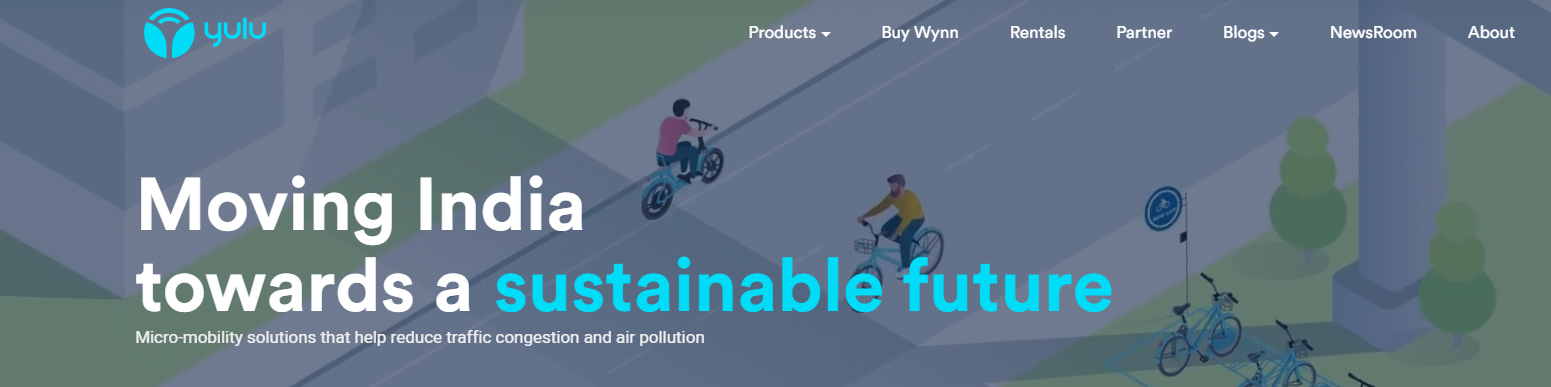


#Yulu is an India-based company with a founding team that is deeply passionate about creating positive social impact. This mindset is instilled in each and every member of our team, and we are dedicated to making a difference in the lives of people around us. So, if you are passionate about the challenges of urban mobility, chaotic congestion, and sustainable living, let’s have a conversation and make a difference together.

#Yulu’s mission is to make urban mobility in India seamless, shareable and sustainable. What started off as an initiative to reduce traffic congestion and pollution in Indian cities, is now redefining urban mobility across the country.


In [45]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#loading the yulu dataset
df=pd.read_csv("yulu.csv")

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#Column Profiling:

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

#Define Problem Statement and perform Exploratory Data Analysis

**Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.**

In [ ]:
#shape of the data
df.shape

(10886, 12)

There are 10886 rows and 12 columns are present in the dataset

In [ ]:
#given datatypes
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
#convertion of data types the respective format
df["datetime"]=pd.to_datetime(df["datetime"])
df["season"]=df["season"].astype("category")
df["holiday"]=df["holiday"].astype("category")
df["workingday"]=df["workingday"].astype("category")
df["weather"]=df["weather"].astype("category")

In [ ]:
#converted datatypes
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
#overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
#cheking for missing values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

It is observed that there are no null values in the dataset

In [ ]:
#statestical summary of integer values
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Great difference between mean and median of count indicates the presence of outliers

In [ ]:
#statestical summary of categorical values
df.describe(include="category")

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


-from the statestical summary of cateforical values :

 it is observed that there is four season data is available out of which fourth season data is more.

 From holiday column it is observed that more data points are from non holidays.

 From workingday column it is observed that more data is about workingdays when compared with non-working days

 From the weather column it is observed that weather 1 contain more number of data points

**Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)**

Text(0.5, 1.0, 'Box plot of registered users count variable')

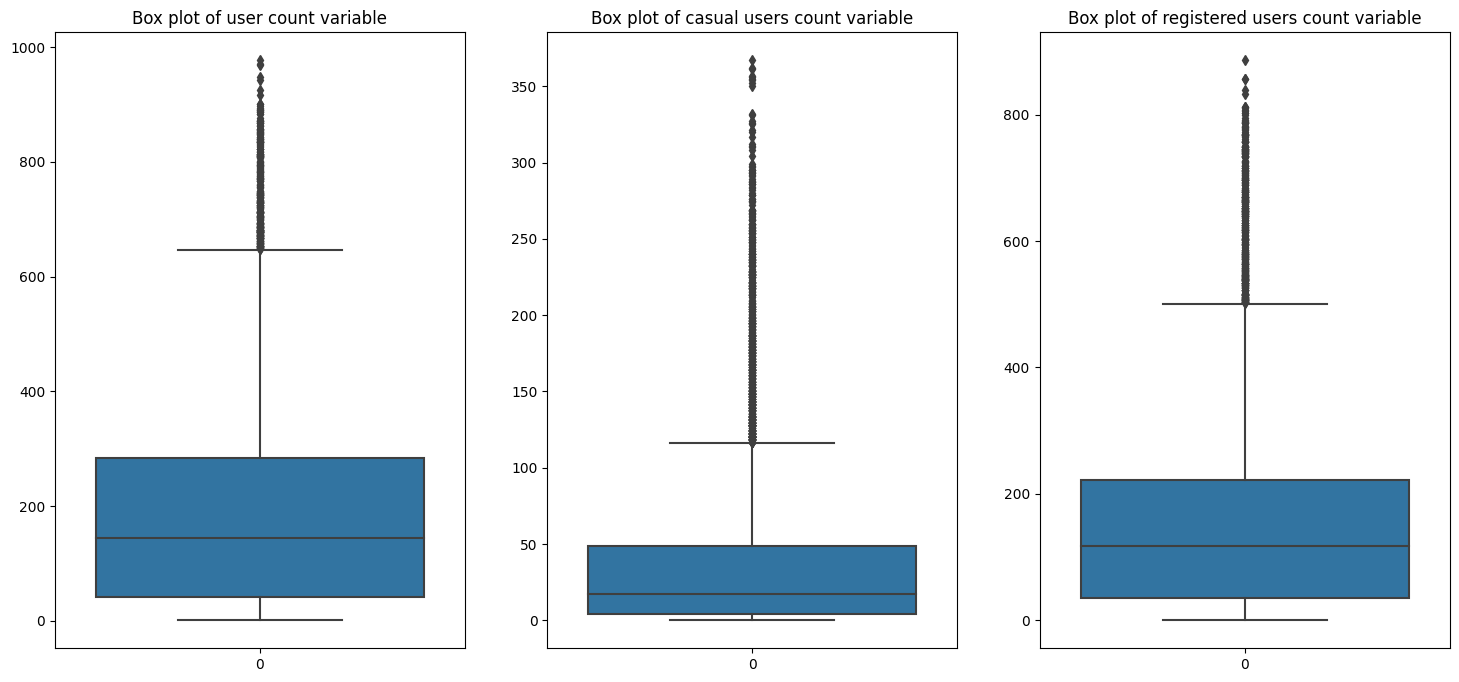

In [ ]:
plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
sns.boxplot(df["count"])
plt.title("Box plot of user count variable")

plt.subplot(1,3,2)
sns.boxplot(df["casual"])
plt.title("Box plot of casual users count variable")

plt.subplot(1,3,3)
sns.boxplot(df["registered"])
plt.title("Box plot of registered users count variable")

-From the data it is observed that there are more registered user count contribution in compared to casual user count contribution

-From the box plots it is visually evident the presence of outliers in the data

Text(0.5, 1.0, 'Count plot of workingday category')

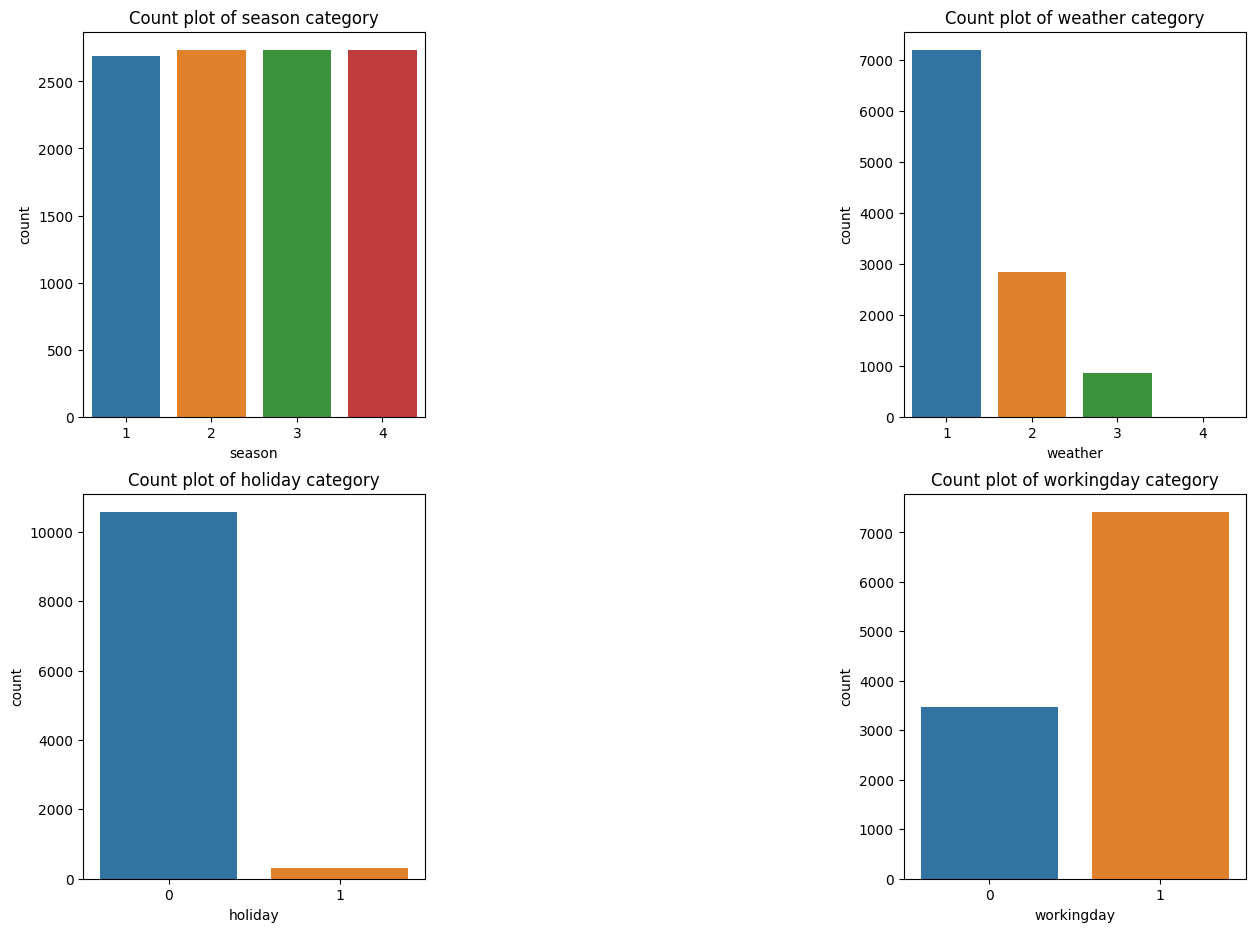

In [ ]:
plt.figure(figsize=(15,11))

plt.subplot(2,3,1)
sns.countplot(x=df["season"])
plt.title("Count plot of season category")

plt.subplot(2,3,3)
sns.countplot(x=df["weather"])
plt.title("Count plot of weather category")

plt.subplot(2,3,4)
sns.countplot(x=df["holiday"])
plt.title("Count plot of holiday category")

plt.subplot(2,3,6)
sns.countplot(x=df["workingday"])
plt.title("Count plot of workingday category")

-From the above visualisations:

-It is observed that all most all the seasons are having similar amount of data

-It is observed that during weather1(Clear, Few clouds, partly cloudy, partly cloudy) majority of the rides are happened

-During holiday times very few count of rides happened

-During working days more number of rides happened

**Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count)**

<Axes: title={'center': 'workingday vs count'}, xlabel='workingday', ylabel='count'>

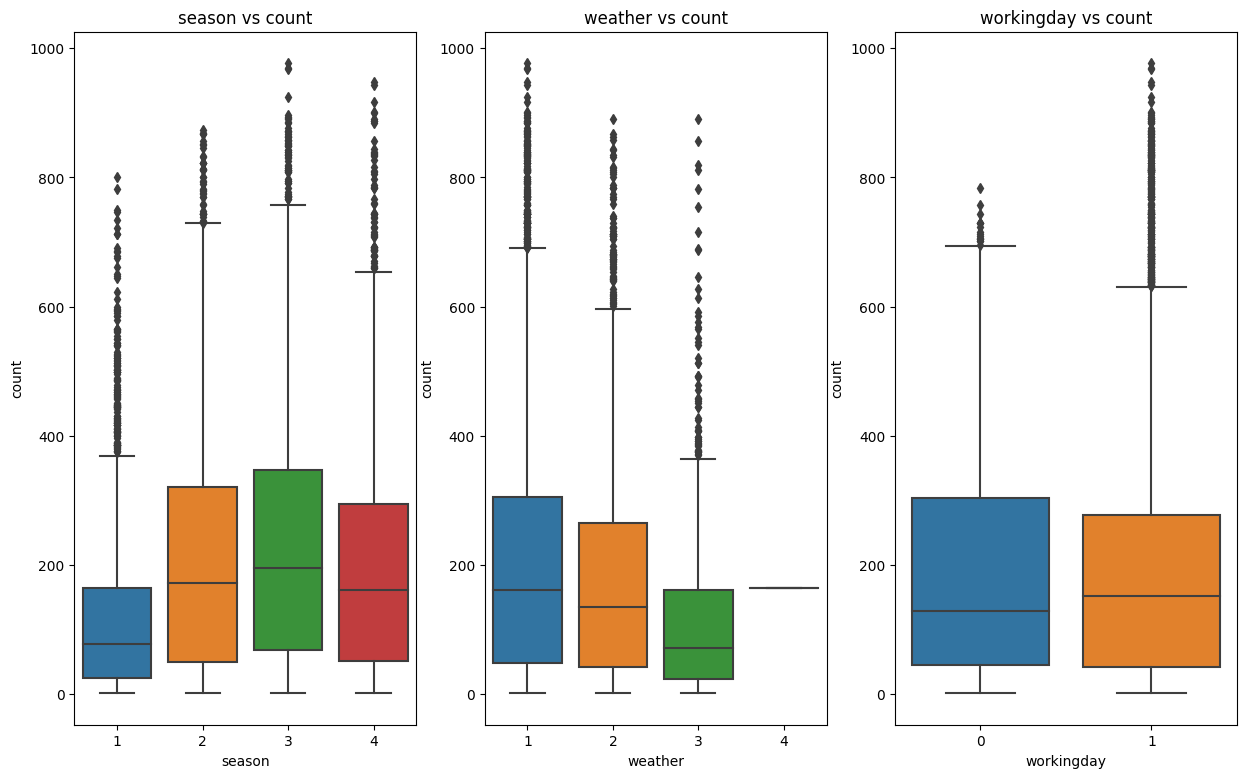

In [ ]:
 plt.figure(figsize=(15,9))


 plt.subplot(1,3,1)
 plt.title("season vs count")
 sns.boxplot(x=df["season"], y=df["count"])

plt.subplot(1,3,2)
plt.title("weather vs count")
 sns.boxplot(x=df["weather"], y=df["count"])

plt.subplot(1,3,3)
plt.title("workingday vs count")
 sns.boxplot(x=df["workingday"], y=df["count"])

From the data it is evident that

-season3(fall) is having lot more median followed by season 2(summer) then by season 4(winter) than rest of all f

-weather 1 is most suitable to travel followed by weather 2 and 3 and negligible mount of data is there dor weather 4

-workingday and non working days have similar range of medians

- all the plots are having outliers


#Hypothesis Testing

**2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented**

-To know whether there is a significant difference in the number of electric cycles rented between working days and non-working days,as the data contain numeric vs 2 category, we can use **ttest_ind()**

In [ ]:
from scipy.stats import  ttest_ind
working_df=df[df["workingday"]==1]
working_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30


In [ ]:
no_working_df=df[df["workingday"]==0]
no_working_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#hypothesis formulation for working days and not working days with the significance of 95% confidence interval or 5 % significance

#Null Hypothesis (H0): There is no significant difference in the number of electric cycles rented between working days and non-working days.
#Alternative Hypothesis (H1): There is a significant difference in the number of electric cycles rented between working days and non-working days.
alpha=0.05
t_stat, p_value=ttest_ind(working_df["count"],no_working_df["count"])
print("t_stat:",t_stat)
print("p_value:",p_value)
if p_value<alpha:
  print("reject null hypothesis")
  print("working days and non working days have different number of electric cycles rented")
else :
  print("failed to reject null hypothesis")
  print("There is no significant difference in the number of electric cycles rented between working days and non-working days")

t_stat: 1.2096277376026694
p_value: 0.22644804226361348
failed to reject null hypothesis
There is no significant difference in the number of electric cycles rented between working days and non-working days


-Based on the results of the test, it is observed that since the p-value is greater than the significance level (0.05), we fail to reject the null hypothesis. This suggests that there is no significant difference in the number of electric cycles rented between working days and non-working days.

**-ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season**

- To determine whether there are any significant differences among the means of the four seasons and the four weather categories in the numeric data, we can utilize an analysis of variance (ANOVA) since we are comparing numeric data against four distinct categories.

-Cheking to see whether the count data is gaussian or not

In [38]:
count_subset = df["count"].sample(100)

In [39]:
from scipy.stats import shapiro
#H0: Data is Gaussian
#Ha: Data is not Guassian
test_stat, p_value = shapiro(count_subset)

if p_value < 0.05:
  print("Reject H0")
  print("Not Gaussian")
else:
  print("Fail to reject H0")
  print("Follows Gaussian")

Reject H0
Not Gaussian


-data is not gaussian

In [ ]:
#seperating weather and count columns for easy analysis
weather=df[["weather","count"]]

In [ ]:
from scipy.stats import  f_oneway
weather.head()

,weather,count
0,1,16
1,1,40
2,1,32
3,1,13
4,1,1


In [ ]:
weather["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

-There are 4 kinds of weathers given in data

In [ ]:
weather_1=weather[weather["weather"]==1]
weather_2=weather[weather["weather"]==2]
weather_3=weather[weather["weather"]==3]
weather_4=weather[weather["weather"]==4]

- checking for equal varience

In [41]:
from scipy.stats import levene
#H0: Variances are equal
#Ha: Variances are not equal

levene_stat, p_value = levene(weather_1["count"], weather_2["count"],weather_3["count"],weather_4["count"])

if p_value < 0.05:
  print("Reject H0")
  print("Variance are not equal")
else:
  print("Fail to reject H0")
  print("Variance are equal")

Reject H0
Variance are not equal


"We will use the Kruskal-Wallis test for ANOVA since the data does not adhere to a Gaussian distribution and does not have equal variances. However, we will also perform the F-test (one-way ANOVA) as a complementary analysis."

In [43]:
from scipy.stats import kruskal
#H0: All weathers have same mean
#Ha: One or more weather have different mean
#with the significance of 0.05
f_stat, p_value=kruskal(weather_1["count"],weather_2["count"],weather_3["count"],weather_4["count"])
print("p_value:", p_value)
alpha=0.05
if p_value< alpha :
  print("reject null hypothesis")
  print("One or more weather have different mean")
else :
  print("data ia not sufficient to reject null hypothesis")
  print("All weathers have same mean")

p_value: 3.501611300708679e-44
reject null hypothesis
One or more weather have different mean


In [ ]:
#H0: All weathers have same mean
#Ha: One or more weather have different mean
#with the significance of 0.05
f_stat, p_value=f_oneway(weather_1["count"],weather_2["count"],weather_3["count"],weather_4["count"])
print("p_value:", p_value)
alpha=0.05
if p_value< alpha :
  print("reject null hypothesis")
  print("One or more weather have different mean")
else :
  print("data ia not sufficient to reject null hypothesis")
  print("All weathers have same mean")

p_value: 5.482069475935669e-42
reject null hypothesis
One or more weather have different mean


-Based on the test conducted, it is observed that the p-value is less than the significance level (0.05). Therefore, we reject the null hypothesis, indicating that at least one of the weather categories has a different mean.

In [ ]:
season=df[["season","count"]]

In [ ]:
season.head()

,season,count
0,1,16
1,1,40
2,1,32
3,1,13
4,1,1


In [ ]:
#seperating weather and count columns for easy analysis
season["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
season_1=season[season["season"]==1]["count"]
season_2=season[season["season"]==2]["count"]
season_3=season[season["season"]==3]["count"]
season_4=season[season["season"]==4]["count"]

In [42]:
from scipy.stats import levene
#H0: Variances are equal
#Ha: Variances are not equal

levene_stat, p_value = levene(season_1, season_2,season_3,season_4)

if p_value < 0.05:
  print("Reject H0")
  print("Variance are not equal")
else:
  print("Fail to reject H0")
  print("Variance are equal")

Reject H0
Variance are not equal


In [44]:
#H0: All seasons have same mean
#Ha: One or more seasons have different mean
#significance of 0.05
alpha=0.05
f_stat, p_value=kruskal(season_1,season_2,season_3,season_4)
print("p_value:",p_value)
if p_value< alpha:
  print("reject null hypothesis")
  print("One or more seasons have different mean")
else:
  print("cannot reject null hypothesis")
  print("All seasons have same mean")

p_value: 2.479008372608633e-151
reject null hypothesis
One or more seasons have different mean


In [ ]:
#H0: All seasons have same mean
#Ha: One or more seasons have different mean
#significance of 0.05
alpha=0.05
f_stat, p_value=f_oneway(season_1,season_2,season_3,season_4)
print("p_value:",p_value)
if p_value< alpha:
  print("reject null hypothesis")
  print("One or more seasons have different mean")
else:
  print("cannot reject null hypothesis")
  print("All seasons have same mean")


p_value: 6.164843386499654e-149
reject null hypothesis
One or more seasons have different mean


-Based on the results of the test, it is observed that the p-value is less than the significance level (0.05). Therefore, we reject the null hypothesis, indicating that at least one of the seasons has a different mean.

**Chi-square test to check if Weather is dependent on the season**

-To determine whether there is a relationship between seasons and weather, we can employ a chi-square contingency analysis.

In [ ]:
from scipy.stats import  chi2_contingency,
# creating contingency table for season and weather
contingency=pd.crosstab(df["season"],df["weather"])
contingency

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
##H0:season and weather are indipendent
#Ha: season and weather are dependent
#significance is 0.05
alpha=0.05
chi_stat, p_value, df, exp=chi2_contingency(contingency)
print("p_value:",p_value)
if p_value< alpha:
  print("reject null hypothesis")
  print("season and weather are dependent")
else:
  print("fail to reject null hypothesis")
  print("season and whether are indipendent")

p_value: 1.549925073686492e-07
reject null hypothesis
season and weather are dependent


Based on the results of the test, it is observed that since the p-value is less than the significance level of 0.05, we can reject the null hypothesis. This suggests that there is a dependence or relationship between the season and weather variables.

#**conclusion**



1. **Data Distribution by Seasons:**
   It is noteworthy that the dataset is fairly evenly distributed across all seasons, indicating a balanced representation of data for each season.

2. **Impact of Weather Conditions:**
   The analysis reveals that weather condition 1 (Clear, Few clouds, partly cloudy, partly cloudy) is associated with the majority of ride occurrences. Conversely, weather 4 has a negligible amount of data, suggesting it may be less favorable for cycling.

3. **Holiday vs. Non-Holiday Rides:**
   During holidays, there is a noticeable drop in the number of rides, indicating that people are less likely to use electric cycles during holiday periods.

4. **Working Days vs. Non-Working Days:**
   The data shows that more rides occur on working days compared to non-working days. This suggests that electric cycles are more frequently used for daily commuting or work-related purposes.

5. **Seasonal Median Usage:**
   Among the seasons, season 3 (fall) has the highest median usage, followed by season 2 (summer), and then season 4 (winter). This suggests that fall is the peak season for electric cycle rentals.

6. **Weather Suitability for Travel:**
   Weather condition 1 is found to be the most suitable for travel, followed by weather conditions 2 and 3. Weather condition 4 is less favorable based on the limited data available.

7. **Similar Median Range for Working Days and Non-Working Days:**
   Both working days and non-working days exhibit a similar range of median usage, indicating consistent usage patterns across these categories.

8. **Outliers in Data:**
   It's important to note that all the plots contain outliers, suggesting that there are occasional extreme data points that deviate from the typical usage patterns.

9. **Statistical Testing - Season and Weather:**
   The statistical test indicates a significant relationship between seasons and weather conditions. The p-value is less than 0.05, leading us to reject the null hypothesis and affirming that season and weather are dependent variables.

10. **Statistical Testing - Working Days and Non-Working Days:**
    In contrast, the test for working days versus non-working days yields a p-value greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating no significant difference in electric cycle rentals between these two categories.

11. **Statistical Testing - Weather Impact:**
    The test conducted on weather conditions shows a p-value less than 0.05, leading to the rejection of the null hypothesis. This suggests that at least one of the weather categories has a different mean, signifying that weather has an impact on electric cycle rentals.

In summary, the data analysis reveals several insights into the factors influencing electric cycle rentals, including season, weather conditions, holidays, and working days. These findings can inform business strategies for electric cycle rental services to optimize offerings and enhance user experiences.